In [1]:
import MDAnalysis
from MDAnalysis.analysis import rdf
from MDAnalysis.analysis import msd

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
run = {'1.5': '10000', '1': '50000',
       '0.9': '150000', '0.8': '150000', 
       '0.7': '180000', '0.65': '350000', 
       '0.6': '1000000', '0.55': '3000000', 
       '0.5': '10000000', '0.475': '30000000', 
       '0.45': '100000000'}
prod_data = dict(zip(run.keys(), [None]*len(run.keys())))
for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    prod_data[str(t)] = MDAnalysis.Universe(f"../Data/equil/kalj_T{t}_n360_v300_{run[str(t)]}_1.lammpstrj", 
                                            f"../Data/prod/kalj_T{t}_n360_v300_prod_{run[str(t)]}_1.unwrap.dcd",
                                            topology_format="LAMMPSDUMP")

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


In [3]:
def cal_rdf(prod_data):
    type1 = prod_data.select_atoms("type 1")
    type2 = prod_data.select_atoms("type 2")

    rdf_11 = rdf.InterRDF(type1, type1).run()
    rdf_22 = rdf.InterRDF(type2, type2).run()
    rdf_12 = rdf.InterRDF(type1, type2).run()
    return rdf_11, rdf_22, rdf_12

def cal_msd(prod_data):
    type1 = prod_data.select_atoms("type 1")

    msd1 = msd.EinsteinMSD(type1).run()
    return msd1

In [26]:
rdf_dict = {}
for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    rdf_dict[t] = cal_rdf(prod_data[str(t)])

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


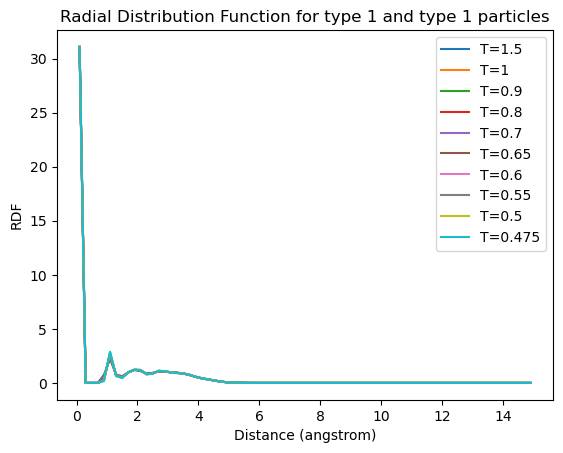

In [29]:
# Now, plot the RDF for particle type 1 and 1
import matplotlib.pyplot as plt
for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    plt.plot(rdf_dict[t][0].bins, rdf_dict[t][0].rdf, label=f"T={t}")
plt.xlabel('Distance (angstrom)')
plt.ylabel('RDF')
plt.legend()
plt.title('Radial Distribution Function for type 1 and type 1 particles')
plt.savefig('../Figures/rdf_1-1.png')
plt.show()

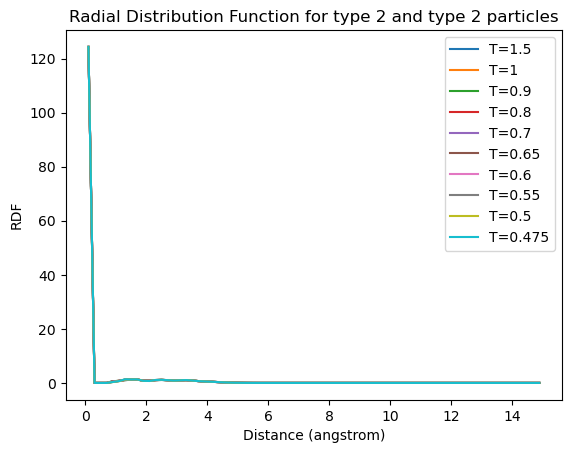

In [30]:
# Now, plot the RDF for particle type 2 and 2
import matplotlib.pyplot as plt
for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    plt.plot(rdf_dict[t][1].bins, rdf_dict[t][1].rdf, label=f"T={t}")
plt.xlabel('Distance (angstrom)')
plt.ylabel('RDF')
plt.legend()
plt.title('Radial Distribution Function for type 2 and type 2 particles')
plt.savefig('../Figures/rdf_2-2.png')
plt.show()

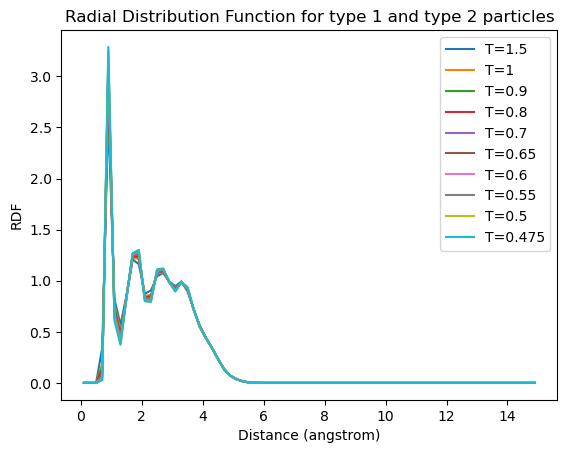

In [31]:
# Now, plot the RDF for particle type 1 and 2
import matplotlib.pyplot as plt
for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    plt.plot(rdf_dict[t][2].bins, rdf_dict[t][2].rdf, label=f"T={t}")
plt.xlabel('Distance (angstrom)')
plt.ylabel('RDF')
plt.legend()
plt.title('Radial Distribution Function for type 1 and type 2 particles')
plt.savefig('../Figures/rdf_1-2.png')
plt.show()

In [5]:
msd_dict = {}
for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    msd_dict[t] = cal_msd(prod_data[str(t)])

In [19]:
for temp, msd_obj in msd_dict.items():
    break
msd_obj.results['msds_by_particle'].mean(axis=1).shape

(501,)

In [39]:
msd_obj.times

array([   0.        ,    2.19996947,    4.39993894,    6.59990841,
          8.79987788,   10.99984735,   13.19981681,   15.39978628,
         17.59975575,   19.79972522,   21.99969469,   24.19966416,
         26.39963363,   28.5996031 ,   30.79957257,   32.99954204,
         35.19951151,   37.39948098,   39.59945044,   41.79941991,
         43.99938938,   46.19935885,   48.39932832,   50.59929779,
         52.79926726,   54.99923673,   57.1992062 ,   59.39917567,
         61.59914514,   63.7991146 ,   65.99908407,   68.19905354,
         70.39902301,   72.59899248,   74.79896195,   76.99893142,
         79.19890089,   81.39887036,   83.59883983,   85.7988093 ,
         87.99877876,   90.19874823,   92.3987177 ,   94.59868717,
         96.79865664,   98.99862611,  101.19859558,  103.39856505,
        105.59853452,  107.79850399,  109.99847346,  112.19844293,
        114.39841239,  116.59838186,  118.79835133,  120.9983208 ,
        123.19829027,  125.39825974,  127.59822921,  129.79819

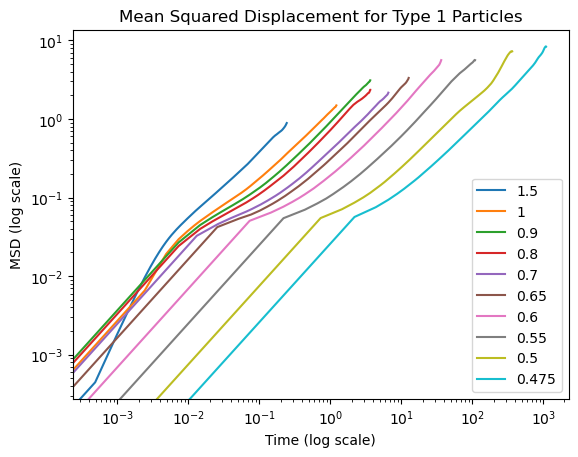

In [41]:
import matplotlib.pyplot as plt
for temp, msd_obj in msd_dict.items():

    # Ensure to use loglog for both axes
    plt.loglog(msd_obj.times,
               msd_obj.run().results['msds_by_particle'].mean(axis=1),
               label=f'{temp}')

plt.xlabel('Time (log scale)')
plt.ylabel('MSD (log scale)')
plt.title('Mean Squared Displacement for Type 1 Particles')
plt.legend()
plt.savefig('../Figures/msd_loglog_plot.png')
plt.show()

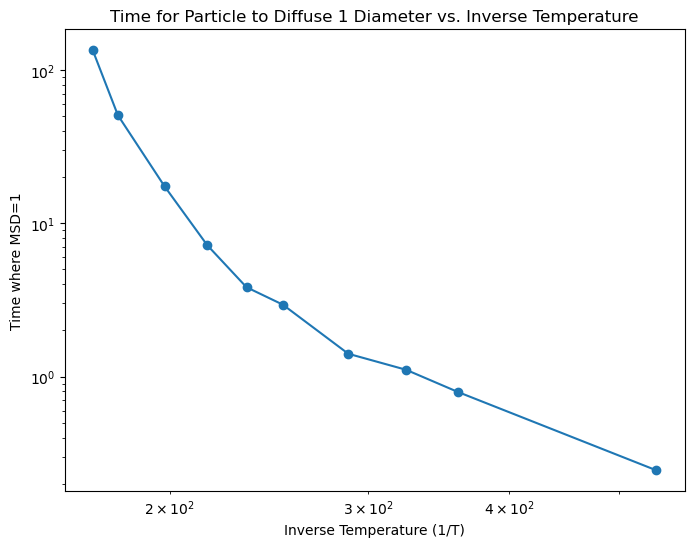

In [47]:
# Function to find the time where MSD first reaches 1
import numpy as np
def find_time_for_msd(msd_obj):
    msd_obj.run()
    # Find the index where the MSD first exceeds 1
    try:
        index = np.where(msd_obj.run().results['msds_by_particle'].mean(axis=1) >= 1)[0][0]
    except:
        index = len(msd_obj.times) - 1
    # Return the time at that index
    return msd_obj.times[index]

times_msd_1 = {}
temperatures = []

for temp_str, msd_obj in msd_dict.items():
    # Extract numerical value of temperature from the string (assuming the format is like '300K')
    temp = temp_str * 360
    temperatures.append(temp)
    
    # Find the time where MSD first reaches 1 and store it
    time = find_time_for_msd(msd_obj)
    times_msd_1[temp_str] = time

# Now let's create the log-log plot
# Convert lists to numpy arrays for easier manipulation
temperatures = np.array(temperatures)
times = np.array(list(times_msd_1.values()))

plt.figure(figsize=(8, 6))
plt.loglog(temperatures, times, 'o-')  # 'o-' creates a line plot with circle markers

plt.xlabel('Inverse Temperature (1/T)')
plt.ylabel('Time where MSD=1')
plt.title('Time for Particle to Diffuse 1 Diameter vs. Inverse Temperature')
plt.savefig('../Figures/time_vs_invtemp_loglog_plot.png')
plt.show()
